[((9.434359830276268, 6.812866406102012), ('square', (5.0,))), ((17.997181720172957, 5.804498531715555), ('circle', (4.0,))), ((3.699415768185774, 5.662909441831596), ('square', (3.0,))), ((13.282105542631735, 11.736479197800726), ('circle', (2.0,))), ((13.005907335789196, 3.7194608423581794), ('square', (2.0,))), ((10.459682614181615, 13.848497579280982), ('circle', (1.0,)))]


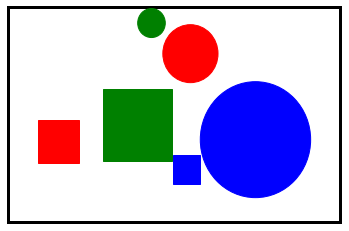

In [4]:
import matplotlib.pyplot as plt
import random
from shapely.geometry import Point, Polygon
from shapely.ops import unary_union
colors = [ 'r','g','b']
# Read input file
with open('input.txt') as f:
    lines = f.readlines()

# Extract dimensions of rectangle
r_x, r_y = map(float, lines[0].split()[1:])

# Create rectangle polygon
#rectangle = Polygon([(0, 0), (r_x, 0), (r_x, r_y), (0, r_y)])
# Create the rectangle using matplotlib
fig, ax = plt.subplots()
ax.set_xlim([0, r_x])
ax.set_ylim([0, r_y])
rect = plt.Rectangle((0, 0), r_x, r_y, facecolor='none',edgecolor = 'black', linewidth = 6)
ax.add_patch(rect)

# Create list of shapes and their dimensions
shapes = [(line.split()[0], tuple(map(float, line.split()[1:]))) for line in lines[1:]]

# Sort shapes by descending order of size
shapes.sort(key=lambda s: max(s[1]), reverse=True)

# Fit shapes inside rectangle
positions = []
for shape in shapes:
    shape_type, shape_dim = shape
    while True:
        # Generate random position for the shape
        x = random.uniform(max(shape_dim), r_x - max(shape_dim))
        y = random.uniform(max(shape_dim), r_y - max(shape_dim))
        pos = Point(x, y)

        # Check for overlapping with other shapes
        overlapping = False
        for p, s in positions:
            s_type, s_dim = s
            # Create shapely polygon for the existing shape
            if s_type == 'circle':
                s_poly = Point(*p).buffer(s_dim[0])
            else:
                s_poly = Polygon([(p[0]-s_dim[0]/2, p[1]-s_dim[0]/2), 
                                   (p[0]+s_dim[0]/2, p[1]-s_dim[0]/2),
                                   (p[0]+s_dim[0]/2, p[1]+s_dim[0]/2), 
                                   (p[0]-s_dim[0]/2, p[1]+s_dim[0]/2)])
            
            # Create shapely polygon for the new shape
            if shape_type == 'circle':
                shape_poly = pos.buffer(shape_dim[0])
            else:
                shape_poly = Polygon([(x-shape_dim[0]/2, y-shape_dim[0]/2), 
                                      (x+shape_dim[0]/2, y-shape_dim[0]/2),
                                      (x+shape_dim[0]/2, y+shape_dim[0]/2), 
                                      (x-shape_dim[0]/2, y+shape_dim[0]/2)])

            # Check if the two polygons intersect
            if s_poly.intersects(shape_poly):
                overlapping = True
                break

        if not overlapping:
            positions.append((pos.coords[0], shape))
            break
print(positions)            
# Write the positions to the output file
with open('output.txt', 'w') as f:
    for pos, shape in positions:
        shape_type, shape_dim = shape
        f.write(f"{shape_type} {shape_dim[0]} {pos[0]} {pos[1]}\n")
        
        
        
        
        
        
# Plot the shapes
import matplotlib.pyplot as plt

# Read the input file
with open('output.txt', 'r') as f:
    lines = f.readlines()

# Initialize the figure
# Plot the circles and squares
for line in lines:
    tokens = line.strip().split()
    shape = tokens[0]
    size = float(tokens[1])
    p = float(tokens[2])
    q = float(tokens[3])
    if shape == 'circle':
        ax.add_artist(plt.Circle((p, q), size, color=random.choice(colors)))
    elif shape == 'square':
        ax.add_artist(plt.Rectangle((p-size/2, q-size/2), size, size, color=random.choice(colors)))

# Set the axis limits and display the plot
ax.set_xlim(0,r_x)
ax.set_ylim(0,r_y)
ax.set_axis_off()
plt.savefig("plot_3_particles.jpg")
plt.show()